In [1]:
from IPython.display import Image,display
from IPython.core.display import HTML 
import ipywidgets as widgets
from ipywidgets import interact, fixed, IntSlider, HBox, Layout, Output, VBox, HTML,HTMLMath, FloatSlider

import matplotlib.pyplot as plt
from numpy import *
from scipy import integrate
#import pylab as p
#import matplotlib.pyplot as p
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
HTML("""
<style>
body {
  counter-reset: section;                       /* Set a counter named 'section', and its initial value is 0. */
}
.container {
  position: relative;
  text-align: center;
  color: white;
}

.bottom-left {
  position: absolute;
  bottom: 8px;
  left: 16px;
}

.top-left {
  position: absolute;
  top: 8px;
  left: 16px;
}

.top-right {
  position: absolute;
  top: 8px;
  right: 16px;
}

.bottom-right {
  position: absolute;
  bottom: 8px;
  right: 16px;
}

.centered {
  position: absolute;
  top: 50%;
  left: 50%;
  transform: translate(-50%, -50%);
}



h3::before {
  counter-increment: section;                   /* Increment the value of section counter by 1 */
  content: "Section " counter(section) ": ";    /* Display the word 'Section ', the value of 
                                                   section counter, and a colon before the content
                                                   of each h3 */
}
</style>
    """)


HTML(value='\n<style>\nbody {\n  counter-reset: section;                       /* Set a counter named \'sectio…

The current situation in the world shows the importance of online and web-based learning. So instead of giving a presentation on how to solve a differential equation I will give a presentation about giving presentations, online and web-based, using jupyter labs.  

<html>
<body>   
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
    <ul style="list-style-type:none;">    
        <li><img src="1200px-Jupyter_logo.svg.png",height=300, width=300 ></li>
        <li><font size="10"><centering>Jupyter notebooks in the (virtual) classroom</centering></font></li>
      </ul>  
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            What is jupyterlab?
        <ul> 
            <li>Web based user interface for open source web applications</li>
            <li>Create and share documents containing live code, equations, visualizations, etc</li>
            <li>Interactive data manipulation and visualization</li>
            <li>Tools for data analysis, programming, GUI creation, etc...</li>
            <li>Support for different programming languages and kernels (native support for programs like matlab, CFD solvers,etc)</li>
            <li>native $\LaTeX$ support</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    


An example of the power of jupyterlabs: The predator-prey model (Lotka-Volterra equations). real-time numerical solution of the model, with user interaction possible by modifying the coefficients using the sliders

In [11]:
#!python
# from: https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

#fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75

#    def lotka_volterra(t, y):
#            F = y[0]
#            R = y[1]
#            return [a*F - b*F*R, -c*R + d*b*F*R]
#
#    SIR_sol = solve_ivp(lotka_volterra, [0, size], [F_0,R_0], t_eval=np.arange(0, size, 0.1))
#    fig = plt.figure()
#    ax = plt.subplot(111)
#    plt.rcParams["figure.figsize"] = [12,12]
#    plt.rcParams["axes.linewidth"] = 2.0
#    plt.rcParams['lines.linewidth'] = 5
#    plt.rcParams['lines.markersize'] = 10
#    plt.rcParams['lines.markeredgecolor'] = 'black'
#    plt.rcParams['font.size'] = 16
#    plt.rcParams['axes.labelsize'] = 16
#    plt.rcParams['axes.labelweight'] = 'bold'
#    plt.rcParams['xtick.labelsize'] = 14
#    plt.rcParams['ytick.labelsize'] = 14
#    plt.rcParams['legend.fontsize'] = 12
#    plt.rcParams['figure.titlesize'] = 12
#    plt.xlabel('time [weeks]')
#    plt.ylabel('population')
#    plt.grid(True)
#    plt.plot(SIR_sol.t,SIR_sol.y[0],label='Foxes')
#    plt.plot(SIR_sol.t,SIR_sol.y[1],label='Rabbits')
#    ax.legend(loc='upper left', frameon=False)
#    plt.show()


# @ means its a decorator, functions are called implicitly
@interact(a=widgets.FloatSlider(min=0.1, max=2, step=0.05, value=1.0),
          b=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.1),
          c=widgets.FloatSlider(min=0.1, max=2, step=0.05, value=1.5),
          d=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.75))
def lotkavolterrasol(a,b,c,d):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


    
    def dX_dt(X, t=0):
        """ Return the growth rate of fox and rabbit populations. """
        return array([ a*X[0] -   b*X[0]*X[1] ,
                      -c*X[1] + d*b*X[0]*X[1] ])
    
    #all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True
    t = linspace(0, 15,  1000)              # time
    X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
    X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
    rabbits, foxes = X.T

    ax1.grid()
    ax1.set_title('Evolution of fox and rabbit populations',fontsize=18)
    ax1.set_xlabel('time [months]', fontsize=15)
    ax1.set_ylabel('population', fontsize=15)
    ax1.plot(t, rabbits, 'r-', label='Rabbits')
    ax1.plot(t, foxes  , 'b-', label='Foxes')
    ax1.legend(loc='best')


    # ---------------------------------------------------------

    values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
    vcolors = plt.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
    #X_f0 = array([     0. ,  0.])
    X_f1 = array([ c/(d*b), a/b])
    
    #------------------------------------------------------------------
    # plot trajectories
    for v, col in zip(values, vcolors):
    #for v in zip(values):
        X0 = v * X_f1                               # starting point
        X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
        ax2.plot( X[:,0], X[:,1], lw=5.0, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

    #-------------------------------------------------------
    # define a grid and compute direction at each point
    ymax = 35 #plt.ylim(ymin=0)[1]                        # get axis limits
    xmax = 60 #plt.xlim(xmin=0)[1]
    nb_points   = 20

    x = linspace(0, xmax, nb_points)
    y = linspace(0, ymax, nb_points)

    X1 , Y1  = meshgrid(x, y)                       # create a grid
    DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
    M = (hypot(DX1, DY1))                           # Norm of the growth rate 
    M[ M == 0] = 1.                                 # Avoid zero division errors 
    DX1 /= M                                        # Normalize each arrows
    DY1 /= M

    ax2.set_title('Trajectories and direction fields',fontsize=18)
    ax2.set_xlabel('Number of rabbits', fontsize=15)
    ax2.set_ylabel('Number of foxes',fontsize=15)
    Q=ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
    #ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
    #plt.show()
    #-------------------------------------------------------
    # recomputes distance between figures and prevents overlapping text on figures that are close to each other
    fig.tight_layout()

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=0.1, step=0.05), FloatSlider(value=…

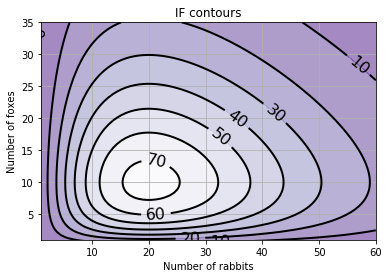

In [108]:
#!python
def IF(X):
    u, v = X
    return u**(c/a) * v * exp( -(b/a)*(d*u+v) )
# We will verify that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    #print("X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G",X0[0], X0[1], I_mean, delta)
# >>> X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
#     X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
#     X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
#     X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
#     X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %

#!python
#-------------------------------------------------------
# plot iso contours
nb_points = 80                              # grid size
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point
f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')
f3.savefig('rabbits_and_foxes_3.png')
p.show()

In [109]:
from IPython.display import clear_output
def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "Correct!" + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + "No! Please try again!" + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="submit")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])
    

In [138]:
Q1 = create_multipleChoice_widget('What kind of figure is the figure above?',['A phase portrait','A Poincare map','A time series plot'],'A phase portrait')
Q2 = create_multipleChoice_widget('What happens if more foxes are introduced?',['Rabbits and foxes go extinct','Occasional rabbit plagues','The foxes all starve'],'Occasional rabbit plagues')
#Q2 = create_multipleChoice_widget('What happens if more foxes are introduced?',['Rabbits and foxes go extinct','Rabbit plagues ','Foxes will die'],'Rabbit plagues')
Q3 = create_multipleChoice_widget('What type of point is the origin?',['A limit cycle','A saddle point','An equilibrium point'],'A saddle point')

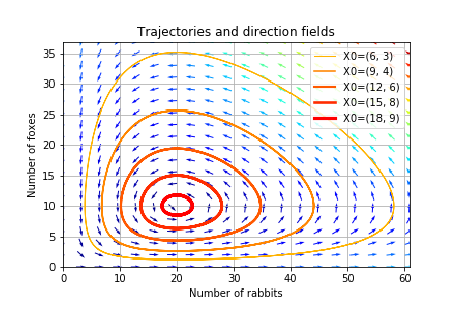

In [139]:
fig, ax = plt.subplots(figsize=(8,8))
img = mpimg.imread('rabbits_and_foxes_2.png')
imgplot = ax.imshow(img)
Q=ax.axis('off')


In [140]:
display(Q1)
display(Q2)
display(Q3)


<html>
<body>    

<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
        Jupyter labs in the classroom
        </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
        <ul>
            <li> written in python, with easy online notebooks</li>
            <li>Online lecture notes and slides</li>
            <li>interactive data manipulation and visualization</li>
            <li>tools for data analysis, programming, GUI creation, etc...</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    


<html>
<body>    
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
        Nonlinear dynamics and control: systems of first order ODEs
                   </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
        Background:
        <ul>
            <li>Ordinary differential equations $\alpha$</li>
            <li>Numerical methods</li>
            <li>Transport Phenomena</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    


<html>
<body>    

<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
          SIR model of a virus outbreak
        </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            The outbreak and spread of a contagious disease can be modeled by the SIR model:
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>
</html>    



<html>
<body> 
 <div class="container">
  <img src="coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       SIR model of a virus outbreak
              </font> 
     </div>
</div> 
<!--
    <img src="coronavirus_cropped.jpg" border=3 style="width:99.6%;margin:0px 0px"> 
    </img>
-->
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
            <!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? -->
            SIR model of a virus outbreak  <br>
        </font> 
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            Classic SIR model: 
            Kermack-McKendrick:<br>
                $\frac{dS}{dt}=-\beta S I$<br>
                $\frac{dI}{dt}=\beta S I - \gamma I $<br>
                $\frac{dR}{dt}=\gamma I$ <br>    
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>
</html>    


In [149]:
%%html
<body> 
 <div class="container">
  <img src="coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       SIR model of a virus outbreak
              </font> 
     </div>
</div> 
<!--
    <img src="coronavirus_cropped.jpg" border=3 style="width:99.6%;margin:0px 0px"> 
    </img>
-->
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
            <!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? -->
            
            
            SIR model of a virus outbreak  <br>
        </font> 
    </td>
    <td style="background-color:#eeeeee;text-align:left">
        <font size="5">
            Classic SIR model: 
            Kermack-McKendrick:<br>
                $\frac{dS}{dt}=-\beta S I$<br>
                $\frac{dI}{dt}=\beta S I - \gamma I $<br>
                $\frac{dR}{dt}=\gamma I$ <br>    
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>   



<!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? --> SIR model of a virus outbreak,"Classic SIR model: Kermack-McKendrick: $\frac{dS}{dt}=-\beta S I$ $\frac{dI}{dt}=\beta S I - \gamma I $ $\frac{dR}{dt}=\gamma I$ $S(t)$ : number of Susceptible persons (persons that are not infected or immune) $I(t)$ : number of Infected persons $R(t)$ : number of Recovered persons (immune) $N = S+I+R$ : total population $\beta$ : infection rate $\alpha$ : recovery rate In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead."


In [148]:
%%html
<body> 
 <div class="container">
  <img src="coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       SIR model of a virus outbreak
              </font> 
     </div>
</div> 


<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
            <!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? -->
            
            
            SIR model of a virus outbreak  <br>
        </font> 
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            Classic SIR model: 
            Kermack-McKendrick:<br>
                $\frac{dS}{dt}=-\beta S I$<br>
                $\frac{dI}{dt}=\beta S I - \gamma I $<br>
                $\frac{dR}{dt}=\gamma I$ <br>    
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>   

<!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? --> SIR model of a virus outbreak,"Classic SIR model: Kermack-McKendrick: $\frac{dS}{dt}=-\beta S I$ $\frac{dI}{dt}=\beta S I - \gamma I $ $\frac{dR}{dt}=\gamma I$ $S(t)$ : number of Susceptible persons (persons that are not infected or immune) $I(t)$ : number of Infected persons $R(t)$ : number of Recovered persons (immune) $N = S+I+R$ : total population $\beta$ : infection rate $\alpha$ : recovery rate In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead."


In [150]:
#%matplotlib inline

import matplotlib.pyplot as plt
from ipywidgets import interact

import ipywidgets as widgets

import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib as mpl
#import matplotlib.pyplot as plt
from datetime import timedelta, datetime
# for nan
#import math

#S_0 = 15000
#population size
N = 1000000
I_0 = 10
R_0 = 0
S_0 = N - I_0 - R_0

# nr of points
size=72


# beta = transmission rate [number per day]
beta = 0.4

# gamma = 1/infectuous period = 1/T, T=5 days
gamma = 0.2

#R = beta/gamma


#def f(x):
#    return x
#        
##interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));
#interact(f, x=widgets.FloatSlider(min=0.4,max=0.6,step=0.01,value=0.5))

# @ means its a decorator, functions are called implicitly
@interact(beta=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.4),gamma=widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.2))
def sirsol(beta,gamma):

    
    def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I/N, beta*S*I/N - gamma*I,gamma*I]

    
    #beta=n
    SIR_sol = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 0.5))

    #index = confirmed.index
    #print("index = ",index)
    #print 
    #x=np.arange(len(new_index))
        
    fig = plt.figure()
    ax = plt.subplot(111)
        
    plt.rcParams["figure.figsize"] = [12,12]
    plt.rcParams["axes.linewidth"] = 2.0
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['lines.markeredgecolor'] = 'black'

    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12

        
    plt.xticks([0,7,14,21,28,35,42,49,56,63,70],['start outbreak','week 1','week 2','week 3','week 4','week 5','week 6','week 7','week 8','week 9','week 10'],rotation=45)
       

    plt.plot(SIR_sol.t,SIR_sol.y[0],label='Susceptible S')
    #plt.plot(prediction.y[1],label='predicted exposed E')
    plt.plot(SIR_sol.t,SIR_sol.y[1],label='Infected I')
    plt.plot(SIR_sol.t,0.96*SIR_sol.y[2],label='Recovered R')
    plt.plot(SIR_sol.t,0.04*SIR_sol.y[2],label='Deaths D')
    ax.legend(loc='upper left', frameon=False)

    plt.show()
    
    
    


interactive(children=(FloatSlider(value=0.4, description='beta', max=2.0, min=0.1), FloatSlider(value=0.2, des…

In [151]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib as mpl
from datetime import timedelta, datetime

F_0 = 5
R_0 = 5

# nr of points
size=16

#a = 0.4
#b = 0.2
#c=1
#d=1

# @ means its a decorator, functions are called implicitly
@interact(a=widgets.FloatSlider(min=0.1, max=2, step=0.05, value=1.0),
          b=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.1),
          c=widgets.FloatSlider(min=0.1, max=2, step=0.05, value=1.5),
          d=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.75))
def sirsol(a,b,c,d):
    def lotka_volterra(t, y):
            F = y[0]
            R = y[1]
            return [a*F - b*F*R, -c*R + d*b*F*R]

    
    #beta=n
    SIR_sol = solve_ivp(lotka_volterra, [0, size], [F_0,R_0], t_eval=np.arange(0, size, 0.1))

      
    fig = plt.figure()
    ax = plt.subplot(111)
        
    plt.rcParams["figure.figsize"] = [12,12]
    plt.rcParams["axes.linewidth"] = 2.0
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['lines.markeredgecolor'] = 'black'

    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12
    
    plt.xlabel('time [weeks]')
    plt.ylabel('population')
    plt.grid(True)
#    plt.xticks([0,7,14,21,28,35,42,49,56,63,70],['start outbreak','week 1','week 2','week 3','week 4','week 5','week 6','week 7','week 8','week 9','week 10'],rotation=45)
       

    plt.plot(SIR_sol.t,SIR_sol.y[0],label='Foxes')
    plt.plot(SIR_sol.t,SIR_sol.y[1],label='Rabbits')
    
    ax.legend(loc='upper left', frameon=False)

    plt.show()
    

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=0.1, step=0.05), FloatSlider(value=…

next slide: comparing with data: pulldown list of all country data data. We find that a fit might be difficult

next slide: fit of coefficients, realization that coefficients are changing in time. Fits take time to compute... do we want this realtime?

next slide: 